# Load packages

In [1]:
# %matplotlib notebook
from python_gdal import *
from models_keras import *
import time

Using TensorFlow backend.


# Data files

In [2]:
MAIN_FOLDER = r'E:/HSI/'
IP_DATA_PATH = 'IP/Indian_pines_corrected'
IP_TRAIN_PATH = 'IP/Indian_pines_gt'
PAVIA_DATA_PATH = "Pavia/Pavia"
PAVIA_TRAIN_PATH = "Pavia/Pavia_gt"
PAVIA_U_DATA_PATH = "Pavia/PaviaU"
PAVIA_U_TRAIN_PATH = "Pavia/PaviaU_gt"
SALINAS_DATA_PATH = "Salinas/Salinas"
SALINAS_TRAIN_PATH = 'Salinas/Salinas_gt'

In [11]:
# 16, 9
# m ,1, 5, 7, 19, 19, 39
# input_shape = (200, 1), (103, 1), (102, 1), (224, 1)
# image_shape = (145, 145), (610, 340), (1096, 715), (512, 217)
c = 9
m = 19
input_shape = (m, m, 3)
image_shape = (610, 340)
n = int((m - 1) / 2)
lists = [200, 200, 200, 200, 200, 200, 200, 200, 200]
bsize = 32000

In [12]:
train_samples, train_labels = get_train_sample(data_path=MAIN_FOLDER+PAVIA_U_DATA_PATH,
                                               train_data_path=MAIN_FOLDER+PAVIA_U_TRAIN_PATH,
                                               c=c, lists=lists, m=m, pca=True)

In [4]:
model = load_model('2dpca_modelPU-19.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 19, 19, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 12)        336       
_________________________________________________________________
batch_normalization_4 (Batch (None, 19, 19, 12)        48        
_________________________________________________________________
activation_4 (Activation)    (None, 19, 19, 12)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 12)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 24)        2616      
_________________________________________________________________
batch_normalization_5 (Batch (None, 10, 10, 24)        96        
__________

In [5]:
from keras import backend as K
for l in range(len(model.layers)):
    print(l, model.layers[l])

0 <keras.engine.input_layer.InputLayer object at 0x000001E562078AC8>
1 <keras.layers.convolutional.Conv2D object at 0x000001E5620788D0>
2 <keras.layers.normalization.BatchNormalization object at 0x000001E5620782E8>
3 <keras.layers.core.Activation object at 0x000001E5620786A0>
4 <keras.layers.pooling.MaxPooling2D object at 0x000001E56521D240>
5 <keras.layers.convolutional.Conv2D object at 0x000001E56521D2E8>
6 <keras.layers.normalization.BatchNormalization object at 0x000001E56521D470>
7 <keras.layers.core.Activation object at 0x000001E56521D588>
8 <keras.layers.pooling.MaxPooling2D object at 0x000001E56521D5C0>
9 <keras.layers.convolutional.Conv2D object at 0x000001E56521D668>
10 <keras.layers.core.SpatialDropout2D object at 0x000001E56521D7F0>
11 <keras.layers.normalization.BatchNormalization object at 0x000001E56521D860>
12 <keras.layers.core.Activation object at 0x000001E56521D978>
13 <keras.layers.pooling.MaxPooling2D object at 0x000001E56521D9B0>
14 <keras.layers.core.Flatten obje

In [53]:
getfeature = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[14].output])

In [54]:
ex_train = getfeature([train_samples])[0]

In [55]:
print(ex_train[100])

[2.8645104e-01 8.6867857e-01 8.3569664e-01 2.7990580e-01 2.8437942e-01
 6.6039467e-01 1.6459818e-01 7.0469713e-01 0.0000000e+00 4.0154576e-01
 1.4274666e-01 6.8219447e-01 0.0000000e+00 7.2475719e-01 1.0033208e+00
 8.4656543e-01 0.0000000e+00 5.6292993e-01 9.8222941e-01 2.0959646e-02
 6.9951057e-01 1.0773001e+00 8.0041677e-01 4.1345146e-01 9.4412208e-01
 8.3146799e-01 8.2799870e-01 0.0000000e+00 0.0000000e+00 7.7928454e-01
 1.0511650e+00 2.0331889e-01 0.0000000e+00 8.2018030e-01 4.9523342e-01
 4.8858088e-01 3.2719380e-01 0.0000000e+00 7.4196434e-01 1.4989328e-01
 6.2611508e-01 3.3507234e-01 0.0000000e+00 0.0000000e+00 1.7565078e-01
 3.4842220e-01 1.0092347e+00 7.3298168e-01 7.4020028e-01 7.8671694e-01
 7.3720670e-01 5.7596749e-01 7.4281687e-01 1.1983104e+00 4.6617830e-01
 5.4306835e-01 2.9467588e-02 3.0338335e-01 1.1837912e+00 1.0060320e+00
 0.0000000e+00 2.4738228e-01 1.3171954e+00 4.7475305e-01 6.1529350e-01
 5.6891400e-01 1.9065499e-01 8.1451643e-01 4.2457959e-01 5.5702293e-01
 8.273

In [ ]:
ex_test = getfeature([])[0]

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
clf = GridSearchCV(SVC(), parameters)

In [80]:
clf.fit(train_samples.reshape(train_samples.shape[0], -1), train_labels)

c:\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
svmclf1 = clf.best_estimator_
svmclf1.fit(train_samples.reshape(train_samples.shape[0], -1), train_labels)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
print(clf.best_score_)

0.8261111111111111


In [92]:
def get_test_pred2(model, data_path, train_data_path, c, lists, bsize, norma_methods='z-score', pca=False, m=1):
    bands_data, is_train, training_labels = get_prep_data(data_path, train_data_path,
                                                          norma_method=norma_methods,
                                                          pca=pca)
    _, x_test_index, _, y_test = custom_train_index(is_train, training_labels, c=c, lists=lists)
    samples = []
    predicts = []
    if m == 1:
        for i in x_test_index:
            sample = bands_data[i[0], i[1]]
            samples.append(sample)
            # # add somethings for specific model.
    else:
        n = int((m - 1) / 2)
        x_test_nindex = x_test_index + n
        bands_data = np.pad(bands_data, ((n, n), (n, n), (0, 0)), 'constant', constant_values=0)
        for i, j in enumerate(x_test_nindex):
            k1 = j[0] - n
            k2 = j[0] + n + 1
            k3 = j[1] - n
            k4 = j[1] + n + 1
            block = bands_data[k1:k2, k3:k4]
            samples.append(block)
            if len(samples) == bsize or i == x_test_nindex.shape[0] - 1:
                print("Batches Predictions...")
                pre = np.stack(samples)
                pre = np.reshape(pre, (-1, m*m*3))
#                 ex_test = getfeature([pre])[0]
                pre = model.predict(pre)
                samples = []
                predicts.append(pre)
    predicts = np.concatenate(predicts)
    print("Batches Predictions Finish!!!")
    print_plot_cm(y_test, predicts)


Batches Predictions...
Batches Predictions...
Batches Predictions Finish!!!
              precision    recall  f1-score   support

         1.0       0.98      0.77      0.86      6431
         2.0       0.98      0.91      0.94     18449
         3.0       0.77      0.81      0.79      1899
         4.0       0.97      0.86      0.91      2864
         5.0       0.27      1.00      0.43      1145
         6.0       0.75      0.85      0.80      4829
         7.0       0.75      0.81      0.78      1130
         8.0       0.91      0.78      0.84      3482
         9.0       1.00      0.78      0.88       747

   micro avg       0.86      0.86      0.86     40976
   macro avg       0.82      0.84      0.80     40976
weighted avg       0.91      0.86      0.88     40976



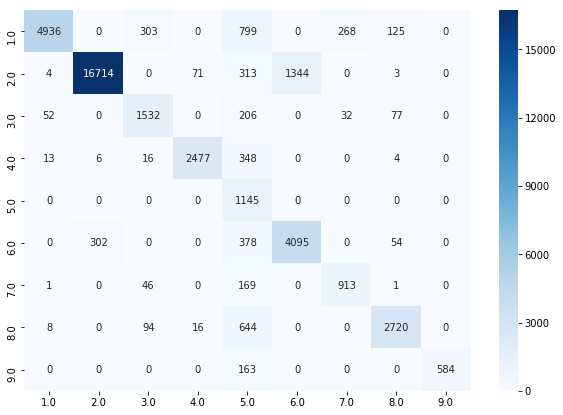

In [93]:
get_test_pred2(model=svmclf1, data_path=MAIN_FOLDER+PAVIA_U_DATA_PATH,
               train_data_path=MAIN_FOLDER+PAVIA_U_TRAIN_PATH,
               c=c, lists=lists, bsize=32000, pca=True, m=m)

In [58]:
clf.fit(ex_train, train_labels)

c:\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
svmclf = clf.best_estimator_
svmclf.fit(ex_train, train_labels)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
def get_test_pred1(model, data_path, train_data_path, c, lists, bsize, norma_methods='z-score', pca=False, m=1):
    bands_data, is_train, training_labels = get_prep_data(data_path, train_data_path,
                                                          norma_method=norma_methods,
                                                          pca=pca)
    _, x_test_index, _, y_test = custom_train_index(is_train, training_labels, c=c, lists=lists)
    samples = []
    predicts = []
    if m == 1:
        for i in x_test_index:
            sample = bands_data[i[0], i[1]]
            samples.append(sample)
            # # add somethings for specific model.
    else:
        n = int((m - 1) / 2)
        x_test_nindex = x_test_index + n
        bands_data = np.pad(bands_data, ((n, n), (n, n), (0, 0)), 'constant', constant_values=0)
        for i, j in enumerate(x_test_nindex):
            k1 = j[0] - n
            k2 = j[0] + n + 1
            k3 = j[1] - n
            k4 = j[1] + n + 1
            block = bands_data[k1:k2, k3:k4]
            samples.append(block)
            if len(samples) == bsize or i == x_test_nindex.shape[0] - 1:
                print("Batches Predictions...")
                pre = np.stack(samples)
                ex_test = getfeature([pre])[0]
                pre = model.predict(ex_test)
                samples = []
                predicts.append(pre)
    predicts = np.concatenate(predicts)
    print("Batches Predictions Finish!!!")
    print_plot_cm(y_test, predicts)


Batches Predictions...
Batches Predictions...
Batches Predictions Finish!!!
              precision    recall  f1-score   support

         1.0       0.99      0.96      0.98      6431
         2.0       1.00      0.98      0.99     18449
         3.0       0.94      0.97      0.96      1899
         4.0       0.98      0.99      0.99      2864
         5.0       1.00      1.00      1.00      1145
         6.0       0.92      0.99      0.96      4829
         7.0       0.94      1.00      0.97      1130
         8.0       0.96      0.98      0.97      3482
         9.0       0.99      1.00      1.00       747

   micro avg       0.98      0.98      0.98     40976
   macro avg       0.97      0.99      0.98     40976
weighted avg       0.98      0.98      0.98     40976



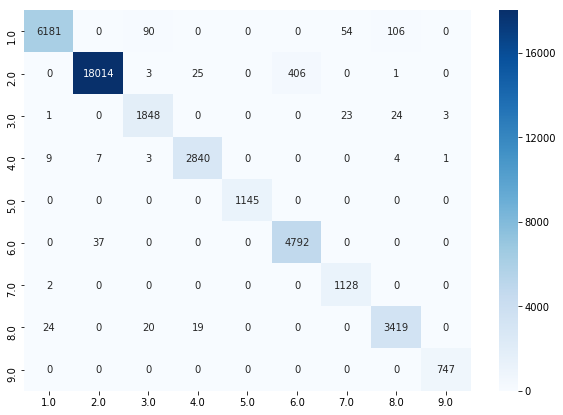

In [61]:
get_test_pred1(model=svmclf, data_path=MAIN_FOLDER+PAVIA_U_DATA_PATH,
               train_data_path=MAIN_FOLDER+PAVIA_U_TRAIN_PATH,
               c=c, lists=lists, bsize=32000, pca=True, m=m)

In [62]:
def write_out_whole_image1(model, data_path, shape, bsize, norma_methods='z-score', pca=False, m=1):
    bands_data_dict = sio.loadmat(data_path)
    bands_data = bands_data_dict[list(bands_data_dict.keys())[-1]]
    bands_data = norma_data(bands_data, norma_methods=norma_methods)
    if pca is True:
        bands_data = pca_data(bands_data)
    if m == 1:
        pre = bands_data.reshape(bands_data.shape[0]*bands_data.shape[1], bands_data.shape[2], 1)
        predicts = model.predict(pre)
    else:
        n = int((m - 1) / 2)
        bands_data = np.pad(bands_data, ((n, n), (n, n), (0, 0)), 'constant', constant_values=0)
        cols = bands_data.shape[1]-2*n
        rows = bands_data.shape[0]-2*n
        result = []
        predicts = []
        for i in range(0, rows, 1):
            for j in range(0, cols, 1):
                data = bands_data[i: i + m, j: j + m, :]
                result.append(data)
                if len(result) == bsize or i == int(rows-1):
                    print("Batches Predictions...")
                    pre = np.stack(result)
                    ex_test = getfeature([pre])[0]
                    predict = model.predict(ex_test)
                    result = []
                    predicts.append(predict)
        predicts = np.concatenate(predicts)
        print("Batches Predictions Finish!!!")
    write_classification_result2(predicts, shape)

Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Pre

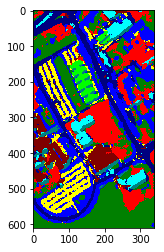

In [63]:
write_out_whole_image1(model=svmclf, data_path=MAIN_FOLDER+PAVIA_U_DATA_PATH,
                       shape=image_shape, bsize=32000, pca=True, m=m)

Batches Predictions...
Batches Predictions...
Batches Predictions Finish!!!
              precision    recall  f1-score   support

         1.0       0.99      0.96      0.97      6431
         2.0       1.00      0.93      0.97     18449
         3.0       0.94      0.96      0.95      1899
         4.0       0.98      0.99      0.99      2864
         5.0       1.00      1.00      1.00      1145
         6.0       0.81      1.00      0.89      4829
         7.0       0.92      1.00      0.96      1130
         8.0       0.95      0.98      0.96      3482
         9.0       0.99      1.00      1.00       747

   micro avg       0.96      0.96      0.96     40976
   macro avg       0.95      0.98      0.97     40976
weighted avg       0.97      0.96      0.96     40976



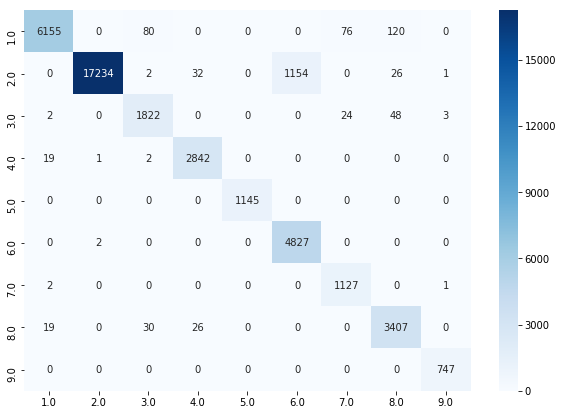

In [35]:
get_test_pred(model=model, data_path=MAIN_FOLDER+PAVIA_U_DATA_PATH,
               train_data_path=MAIN_FOLDER+PAVIA_U_TRAIN_PATH,
               c=c, lists=lists, bsize=32000, pca=True, m=m)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {"n_neighbors": [1, 5, 10, 30],
              "weights": ['uniform', 'distance'],
              "metric": ['minkowski','euclidean','manhattan'],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(ex_train, train_labels)

c:\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 5, 10, 30], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
kclf = kgclf.best_estimator_

In [69]:
kclf.fit(ex_train, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Batches Predictions...
Batches Predictions...
Batches Predictions Finish!!!
              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98      6431
         2.0       1.00      0.97      0.99     18449
         3.0       0.96      0.98      0.97      1899
         4.0       0.99      0.99      0.99      2864
         5.0       1.00      1.00      1.00      1145
         6.0       0.91      1.00      0.95      4829
         7.0       0.93      1.00      0.97      1130
         8.0       0.96      0.98      0.97      3482
         9.0       0.99      0.99      0.99       747

   micro avg       0.98      0.98      0.98     40976
   macro avg       0.97      0.99      0.98     40976
weighted avg       0.98      0.98      0.98     40976



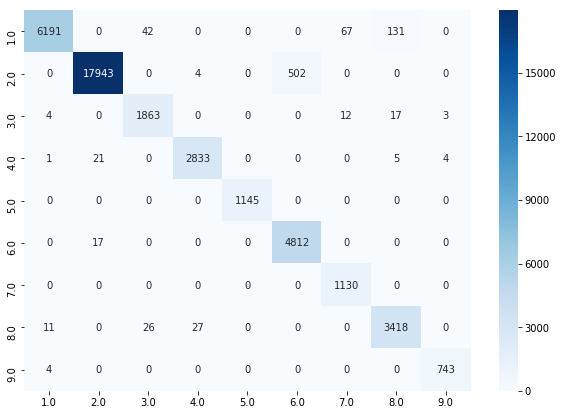

In [70]:
get_test_pred1(model=kclf, data_path=MAIN_FOLDER+PAVIA_U_DATA_PATH,
               train_data_path=MAIN_FOLDER+PAVIA_U_TRAIN_PATH,
               c=c, lists=lists, bsize=32000, pca=True, m=m)

Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Predictions...
Batches Pre

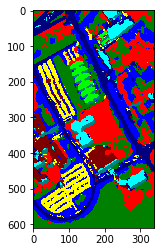

In [71]:
write_out_whole_image1(model=kclf, data_path=MAIN_FOLDER+PAVIA_U_DATA_PATH,
                       shape=image_shape, bsize=32000, pca=True, m=m)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
#               "min_samples_split": [1.0, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"],
              "n_estimators": [10, 20, 50]}
rclf = RandomForestClassifier()
rgclf = GridSearchCV(rclf, param_grid=parameters)
rgclf.fit(ex_train, train_labels)

c:\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'n_estimators': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
rclf = rgclf.best_estimator_
rclf.fit(ex_train, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Batches Predictions...
Batches Predictions...
Batches Predictions Finish!!!
              precision    recall  f1-score   support

         1.0       1.00      0.91      0.95      6431
         2.0       1.00      0.97      0.98     18449
         3.0       0.89      0.95      0.92      1899
         4.0       0.94      0.99      0.97      2864
         5.0       1.00      1.00      1.00      1145
         6.0       0.92      0.99      0.95      4829
         7.0       0.86      0.99      0.92      1130
         8.0       0.92      0.96      0.94      3482
         9.0       0.97      0.99      0.98       747

   micro avg       0.97      0.97      0.97     40976
   macro avg       0.94      0.97      0.96     40976
weighted avg       0.97      0.97      0.97     40976



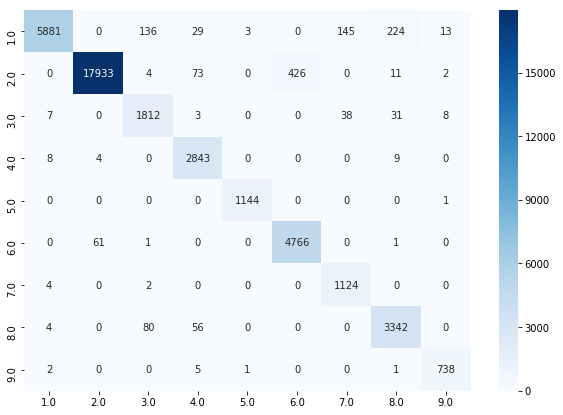

In [77]:
get_test_pred1(model=rclf, data_path=MAIN_FOLDER+PAVIA_U_DATA_PATH,
               train_data_path=MAIN_FOLDER+PAVIA_U_TRAIN_PATH,
               c=c, lists=lists, bsize=32000, pca=True, m=m)